<h1><center>Berechnung der Kurvenlänge</center></h1>
<br>

<div>
    <center>
        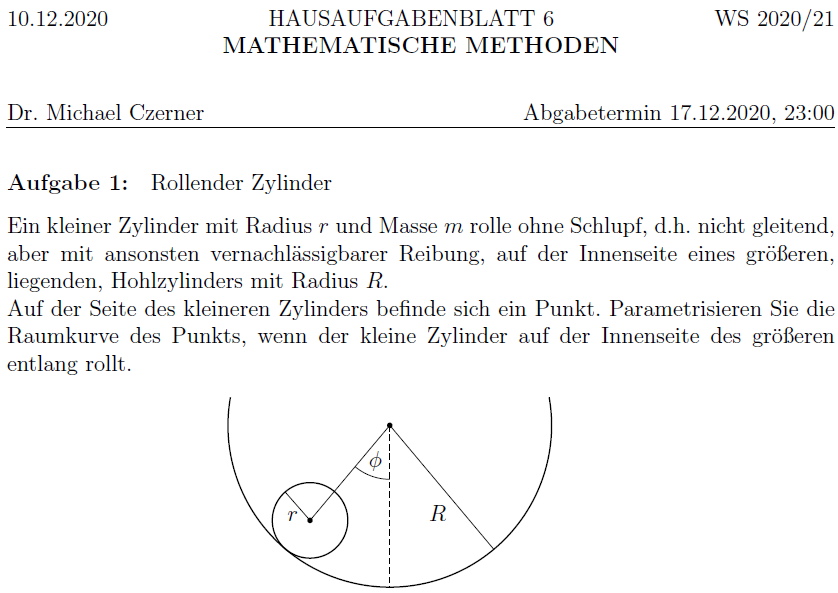
    </center>
</div>

Modellierung mit Geogebra:<br>
[blue_text](www.google.de)

Relativ weit unten bei Geogebra siehst du a=Integral(h,t1,t2) und b=Integral(h,t3,t4).<br>
Der Zahlenwert representiert die exakte Kurvenlänge.<br>
**Bitte ignoriere die Rechenschritte, die ich für die Berechnung der Kurvenlänge in Geogebra gemacht habe.**

Lass uns nun versuchen, die Kurvenlänge mit Hilfe des Computers zu **approximieren**.

# 1. Schritt:

## Wir importieren wichtige Pakete

In [ ]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
import time

## Parameter, die du frei bestimmen kannst

In [ ]:
# Radien der Zylinder
R=13
r=7

# Winkel, zwischen denen du die Kurvenbahn als auch deren Länge bestimmen möchtest
phi_start = 0*np.pi
phi_end = 2*np.pi

# Punkt auf dem kleinen Zylinder
k = 0

# je kleiner delta_phi, je genauer die Approximation
delta_phi = 0.1

## Test, ob 0<r<R gültig ist
Wenn die Bedingung **nicht** erfüllt ist, dann Programmabbruch mit Fehlermeldung.

In [ ]:
if(not 0<r<R):
    raise SystemExit("Folgende Bedindung ist nicht erfüllt: 0<r<R")

## Das Model der Kurvenbahn, welches wir hergeleitet haben

In [ ]:
def get_phi(phi_start,phi_end,delta_phi):
    return np.arange(phi_start,phi_end+delta_phi,delta_phi)

def get_x_y(R,r,phi,k):
    x = -(R-r)*np.sin(phi) + r*np.sin(R/r*phi+k)
    y = -(R-r)*np.cos(phi) - r*np.cos(R/r*phi+k)
    return x,y

phi = get_phi(phi_start,phi_end,delta_phi)
x,y = get_x_y(R,r,phi,k)

## Plot der Kurve

In [ ]:
def plot_curve(x,y,R=R,r=r,phi_start=phi_start,phi_end=phi_end,delta_phi=delta_phi,k=k):
    left, width = .43, .5
    bottom, height = .25, .15
    right = left + width
    top = bottom + height
    ax = plt.figure()
    plt.plot(x, y, '-')
    plt.xlabel("x")
    plt.ylabel("y")
    textstr = '\n'.join((
    r'$R=%.2f$' % (R, ),
    r'$r=%.2f$' % (r, ),
    r'$\phi_{start}=%.2f$' % (phi_start, ),
    r'$\phi_{end}=%.2f$' % (phi_end, ),
    r'$\Delta\phi=%f$' % (delta_phi, ),
    r'$k=%.2f$' % (k, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(right, 0.5*(bottom+top), textstr, fontsize=14,
        verticalalignment='bottom', bbox=props)
    plt.show()

def plot_new_curve(R,r,phi_start,phi_end,delta_phi,k):
    phi = get_phi(phi_start,phi_end,delta_phi)
    x,y = get_x_y(R,r,phi,k)
    plot_curve(x,y,R,r,phi_start,phi_end,delta_phi,k)

In [ ]:
plot_curve(x,y)

In [ ]:
plot_new_curve(R=25,r=5,phi_start=np.pi/2,phi_end=np.pi,delta_phi=0.1,k=np.pi)

# 2. Schritt

## Pythagoras mit einer for-Schleife

In [ ]:
start_time = time.time()
length_1 = 0
for i in range(0, len(x)-1):
    delta_x = np.power(x[i] - x[i+1], 2)
    delta_y = np.power(y[i] - y[i+1], 2)
    length_1 += np.sqrt(delta_x + delta_y)

print("%s seconds" % (time.time() - start_time))
print(length_1)

## Pythagoras in Vektorschreibweise

In [ ]:
start_time = time.time()
def get_delta(array_input):
    vec_1 = np.insert(array_input,0,-500)   
    vec_2 = np.insert(array_input,len(array_input),-500)
    return np.power(np.delete(vec_1 - vec_2, [0,len(vec_1)-1]),2)

delta_x = get_delta(x)
delta_y = get_delta(y)

length_2 = np.sum(np.sqrt(delta_x + delta_y))

print("%s seconds" % (time.time() - start_time))
print(length_2)

Wir sehen, dass der Zahlenwert für die Kurvenlänge gleich ist, aber die Berechnung durch die Vektorschreibweise deutlich schneller abläuft.

### Versuche daher auf for-Schleifen zu verzichten, wenn dies möglich ist

# 3. Schritt

## Lass uns die exakte Kurvenlänge berechnen

Bitte ignoriere die folgenden Rechenschritte.<br>Bitte betrachte **nur** den Output der nächsten Zelle.

In [ ]:
start_time = time.time()
def get_ellipe(R,r,phi,k):
    phi_input = (k+(R*phi)/r+phi)/2
    m = 4*(r-R)*R/np.power(r,2)
    return special.ellipeinc(phi_input,m)

def get_difference_ellipe(R,r,phi_start,phi_end,k):
    return get_ellipe(R,r,phi_end,k) - get_ellipe(R,r,phi_start,k)

length_exact = 2*np.power(r,2)/(R+r)*get_difference_ellipe(R,r,phi_start,phi_end,k)

print("%s seconds" % (time.time() - start_time))
print(length_exact)

Verkleinere delta_phi und lass nochmal alle Berechnungen durchlaufen. <br>
Was bemerkst du?

# Fazit

### Je mehr Mathematik du in eine Aufgabe steckst, desto schneller wird sie vom Computer berechnet.